In [27]:
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (20.0, 10.0)
%matplotlib inline

loans = pd.read_pickle( 'C:\lc data\lc.pickle' )

Looking at all charged off loans, but can also look at only 3-year or 5-year loans.  Data looks similar

In [28]:
loans.term = loans.term.str.strip()

#& term == "36 months"

charged_off_loans = loans.query( 'loan_status == "Charged Off" ' )[ ['issue_d', 'last_pymnt_d'] ]
charged_off_loans.dropna(inplace=True, how='any')

charged_off_loans.head(5)

,issue_d,last_pymnt_d
id,,
1077430,2011-12-01,2013-04-01
1071795,2011-12-01,2012-04-01
1071570,2011-12-01,2012-11-01
1064687,2011-12-01,2012-07-01
1069057,2011-12-01,2013-10-01


Looks like LC only reports issue/payment date on the first of each month. Let's confirm

In [29]:
charged_off_loans.issue_d.dt.is_month_start.all()

True

In [30]:
charged_off_loans.last_pymnt_d.dt.is_month_start.all()

True

### Number of months to charge off
I didn't want to use dt.days/30 and this seemed easier than relative_date()

In [31]:
time_to_charge_off =  (charged_off_loans.last_pymnt_d.dt.year * 12 + charged_off_loans.last_pymnt_d.dt.month) - (charged_off_loans.issue_d.dt.year*12 + charged_off_loans.issue_d.dt.month)
time_to_charge_off.describe()

count    44721.000000
mean        13.120346
std          8.403807
min          1.000000
25%          7.000000
50%         11.000000
75%         18.000000
max         62.000000
dtype: float64

50% of chargeoffs happen in the first year of the loan's life

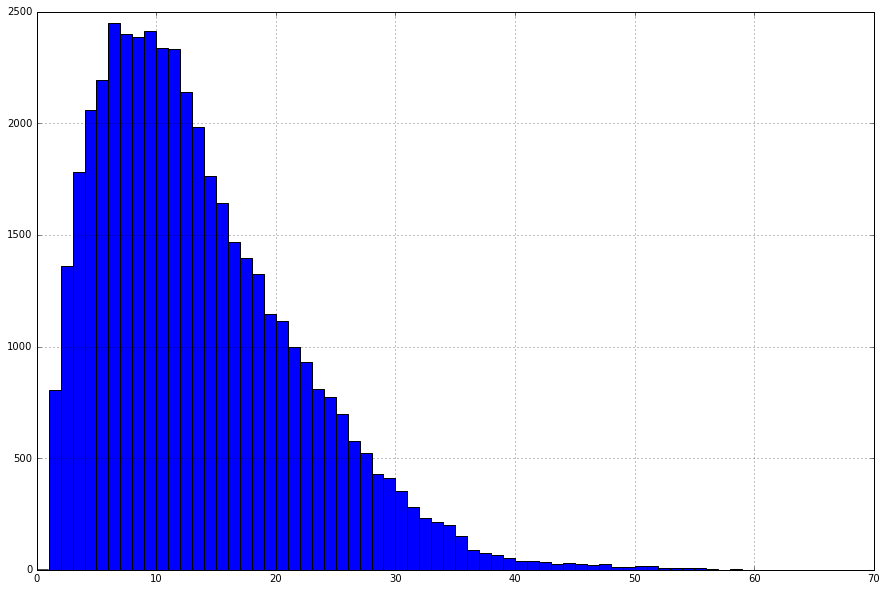

In [32]:
time_to_charge_off.hist(bins=70, range=(0,70), figsize=(15,10))

I wonder if certain months have more charge offs

## Time of year of chargeoffs

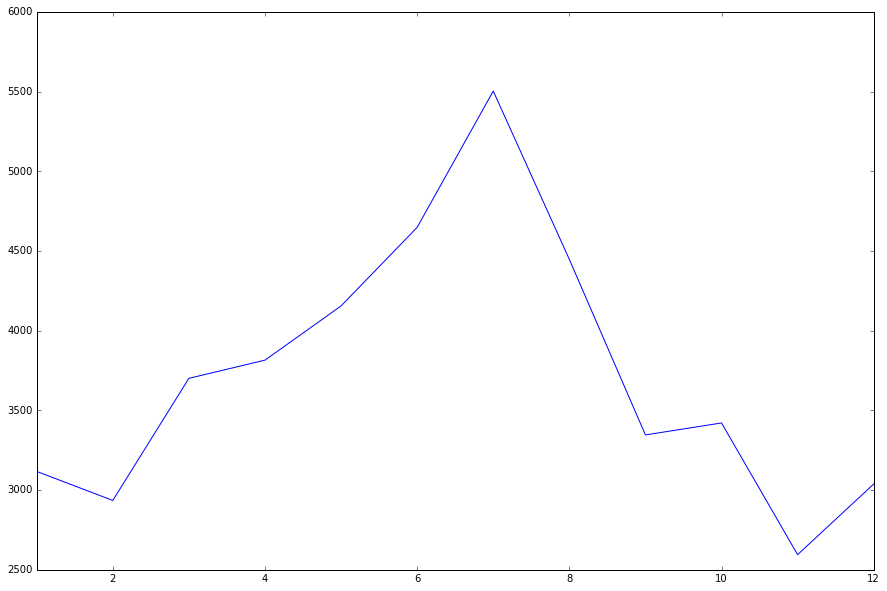

In [33]:
charged_off_loans.last_pymnt_d.dt.month.value_counts(sort=False).plot(figsize=(15,10))

In [38]:
charged_off_loans.last_pymnt_d.dt.month.value_counts(sort=False)

1     3117
2     2935
3     3701
4     3815
5     4155
6     4648
7     5503
8     4447
9     3346
10    3421
11    2595
12    3038
Name: last_pymnt_d, dtype: int64

Chargeoffs peak in july/august. But loans need to go late before that, so we should shift by about four months prior. 

In [39]:
charged_off_loans.last_pymnt_d.dt.month.value_counts(sort=False).shift(-4)

1     4155.0
2     4648.0
3     5503.0
4     4447.0
5     3346.0
6     3421.0
7     2595.0
8     3038.0
9        NaN
10       NaN
11       NaN
12       NaN
Name: last_pymnt_d, dtype: float64

So March is when these loans will really start to miss payments